In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

In [ ]:
data=pd.read_csv("insurance (1) (1).csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
bmi_male_data = data[data['sex'] == 'male']['bmi']
bmi_female_data = data[data['sex'] == 'female']['bmi']

t_stat, p_value_bmi = ttest_ind(bmi_male_data, bmi_female_data, equal_var=True)

contigency_table = pd.crosstab(data['sex'], data['smoker'])

chi2_stat, p_value_smoker, dof, expected = chi2_contingency(contigency_table)

print("Hypothesis 1: BMI Comparison")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value_bmi:.2f}")

print("\nHypothesis 2: Smoker Propotion Comparison")
print(f"Chi-square-statistics: {chi2_stat:.2f}, P-value: {p_value_smoker:.2f}")

Hypothesis 1: BMI Comparison
T-statistic: 1.70, P-value: 0.09

Hypothesis 2: Smoker Propotion Comparison
Chi-square-statistics: 7.39, P-value: 0.01


Portfolio for Stocks.

[*********************100%***********************]  2 of 2 completed


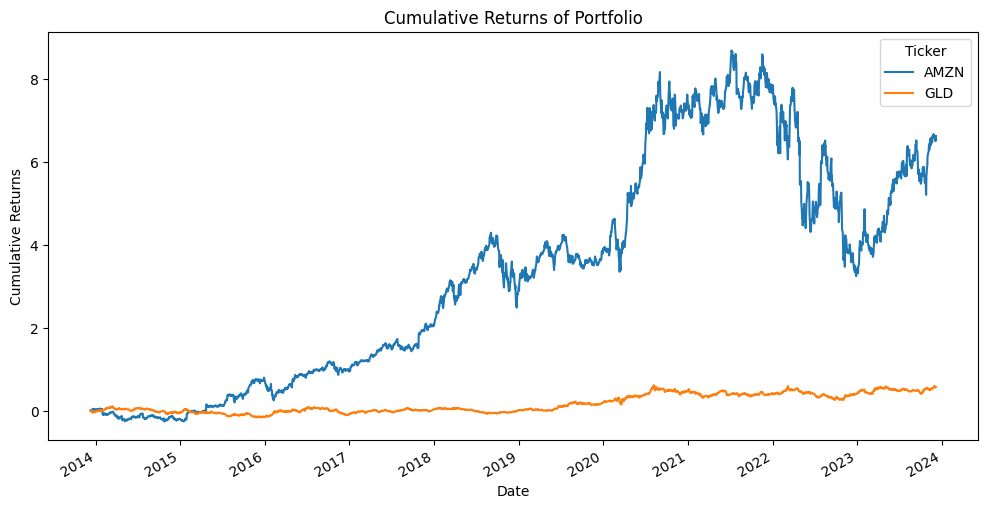

Annual Mean Returns:
Ticker
AMZN    0.258491
GLD     0.055275
dtype: float64

Correlation Matrix:
Ticker      AMZN       GLD
Ticker                    
AMZN    1.000000  0.024391
GLD     0.024391  1.000000

Sharpe Ratios:
Ticker
AMZN    0.779293
GLD     0.390978
dtype: float64

Daily Standard Deviation:
Ticker
AMZN    0.020895
GLD     0.008906
dtype: float64


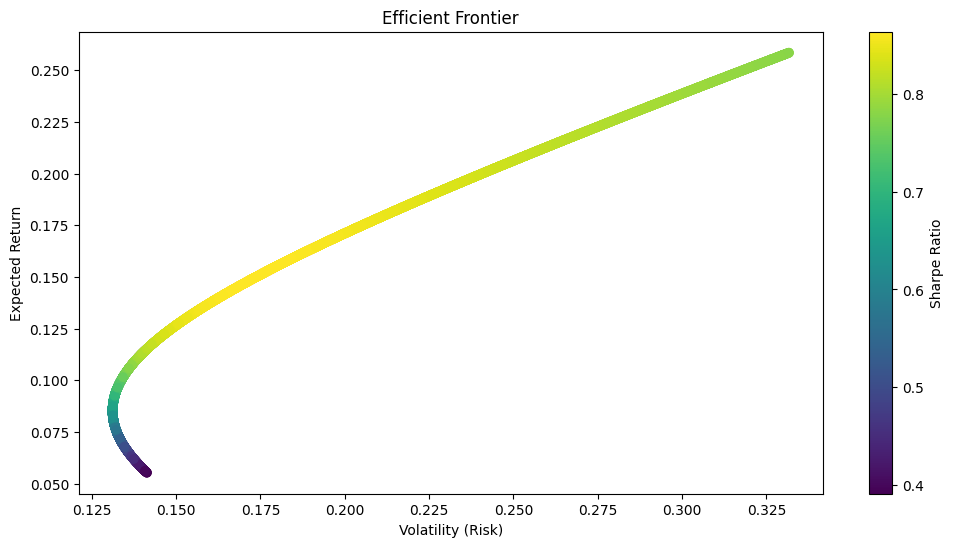


Optimal Portfolio:
Return    0.150513
Risk      0.174293
Sharpe    0.863563
Name: 4688, dtype: float64

Optimal Weights:
  Stock    Weight
0   GLD  0.468655
1  AMZN  0.531345


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['GLD', 'AMZN']
start_date = '2013-12-08'
end_date = '2023-12-08'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

daily_returns = data.pct_change().dropna()

cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Returns of Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


annual_mean_returns = daily_returns.mean() * 252
print("Annual Mean Returns:")
print(annual_mean_returns)

correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

sharpe_ratios = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
print("\nSharpe Ratios:")
print(sharpe_ratios)

daily_std_dev = daily_returns.std()
print("\nDaily Standard Deviation:")
print(daily_std_dev)


num_portfolios = 10000
weights_array = []
returns_array = []
std_devs_array = []
sharpe_array = []

for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= weights.sum()
    weights_array.append(weights)
    portfolio_return = np.dot(weights, annual_mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std
    returns_array.append(portfolio_return)
    std_devs_array.append(portfolio_std)
    sharpe_array.append(sharpe_ratio)

portfolios = pd.DataFrame({
    'Return': returns_array,
    'Risk': std_devs_array,
    'Sharpe': sharpe_array
})

plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Risk'], portfolios['Return'], c=portfolios['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

optimal_portfolio = portfolios.loc[portfolios['Sharpe'].idxmax()]
print("\nOptimal Portfolio:")
print(optimal_portfolio)

optimal_weights = weights_array[portfolios['Sharpe'].idxmax()]
optimal_weights_df = pd.DataFrame({'Stock': tickers, 'Weight': optimal_weights})
print("\nOptimal Weights:")
print(optimal_weights_df)
